you are given the following data collected as displacement of a swinging pendulum with respect to time. it is postulated that the data can be modelled with a sine or cosine wave in the form: <br>
$$ y = Acos(wt + phi) $$ <br>
find the coefficieints in the above model by fitting the data to the given model

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.metrics import r2_score

array([3.94836219, 2.99899521, 0.10411352])

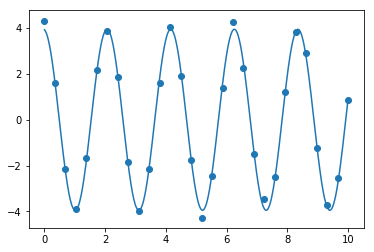

In [2]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])
def func1(t,A,w,phi):
    return A * np.cos(w*t + phi)
popt,pcov = curve_fit(func1,t_data,y_data, p0 =(4,np.pi,0))
plt.scatter(t_data,y_data)
t1 = np.arange(min(t_data),max(t_data),0.01)
y1 = func1(t1,popt[0],popt[1],popt[2])
plt.plot(t1,y1)
popt

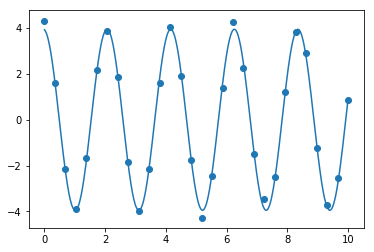

In [3]:
f = lambda t,A,w,phi: A * np.sin(w*t + phi)
popt1 , pcov1 = curve_fit(f,t_data,y_data,p0 = (4,np.pi,0))
y = f(t1,popt1[0],popt1[1],popt1[2])
plt.scatter(t_data,y_data)
plt.plot(t1,y)

Heart rate data (Beats per minute or BPM) as a function of time (sec) for a twenty-minute period of constant exertion is found on this link https://apmonitor.com/che263/uploads/Main/heart_rate.txt. The time of each measurement, in seconds, is listed in column A, and the measured heart rate, in beats per minute, in column B. a. Determine the values of c0, c1, c2, and c3 that result in the best fit of the data to the following equation:<br>
$$ BPM = c_{0} + c_{1}t - c_{2}e^{(-c_{3}t)}$$



In [4]:
import pandas as pd

In [5]:
BPM_data = pd.read_csv('https://apmonitor.com/che263/uploads/Main/heart_rate.txt')
BPM = BPM_data.values
t_data , y_data = BPM[:,0] , BPM[:,1]

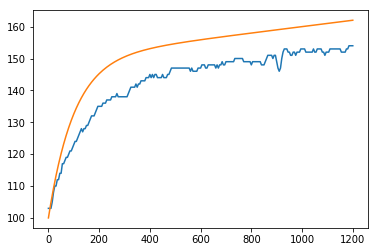

In [6]:
def func2(t,c0,c1,c2,c3):
    return c0 + (c1 * t) - c2 * np.exp(-c3 * t)
#to get a good starting point for the data you could start off with  some guess work
g = [150,0.01,50,0.01]
bpm_guess = func2(t_data,g[0],g[1],g[2],g[3])
plt.plot(t_data,y_data)
plt.plot(t_data,bpm_guess)

In [7]:
popt3,pcov3 = curve_fit(func2,t_data,y_data,p0 = (150,0.01,50,0.01,))
popt3[1]

0.00924805719712931

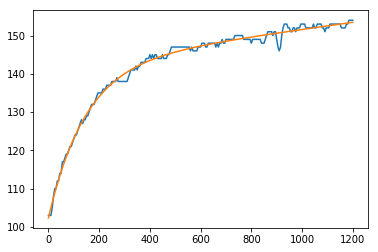

In [8]:
t = np.linspace(min(t_data),max(t_data),len(t_data))
y = func2(t,popt3[0],popt3[1],popt3[2],popt3[3])
plt.plot(t_data,y_data)
plt.plot(t,y)

determination of r^2

In [9]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y_data,y))

R^2:  0.99303758476466


fit the following data to df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'y': [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]}) to a 4th order polynomial equation.

In [342]:
df_1 =  pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                      'y': [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]})

23.33149970878187

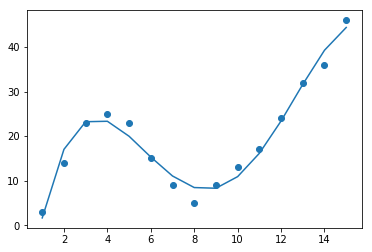

In [11]:
x_data , y_data = df_1.values[:,0], df_1.values[:,1]
def func3(x,a,b,c,d,e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e
popt4,pcov4 = curve_fit(func3,x_data,y_data, p0=(1,1,1,1,1))
x = np.linspace(min(x_data),max(x_data),len(x_data))
y = func3(x,popt4[0],popt4[1],popt4[2],popt4[3],popt4[4])
plt.scatter(x_data,y_data)
plt.plot(x,y)
func3(4,popt4[0],popt4[1],popt4[2],popt4[3],popt4[4])

In [12]:
r2 = r2_score(y_data,y)
r2

0.9707340089345124

In [13]:
coeffs = np.polyfit(x_data,y_data,4)
coeffs

array([-1.92443006e-02,  7.08116932e-01, -8.36485930e+00,  3.58231141e+01,
       -2.65161505e+01])

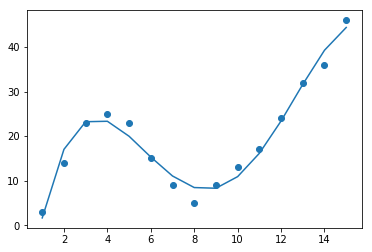

In [14]:
plt.scatter(x_data,y_data)
plt.plot(x,np.polyval(coeffs,x))

Develop a curve to fit some real world observations of economic data. Use the so-called “Longley’s Economic Regression” dataset; you can learn more about it here:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv <br>
https://github.com/jbrownlee/Datasets/blob/master/longley.names

There are seven input variables and 16 rows of data, where each row defines a summary of economic details for a year between 1947 to 1962. You are required to explore different models for the relationship bettween population size and the number of people employed for each year and obtain coefficitients for each model.

In [30]:
econ_data_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv', header = None)
econ_data_df.rename({0:'GNP.deflator',
                     1:'GNP',
                     2:'Unemployed',
                     3:'Armed',
                     4:'Population',
                     5:'Year',
                     6:'Employed',
                    },axis = 1)

,GNP.deflator,GNP,Unemployed,Armed,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,104.6,419.180,282.2,285.7,118.734,1956,67.857


R2: 0.893606752215925
R3: 0.8950619117248033
R4: 0.9019995444195166
R5: 0.9014926231154426
RSin: 0.8534430172261475


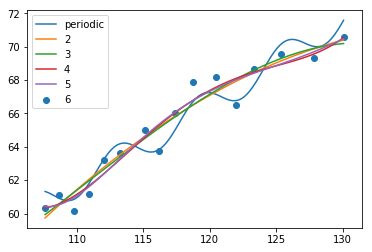

In [337]:
x_data, y_data = econ_data_df.values[:,4] , econ_data_df.values[:,-1]

t = np.linspace(min(x_data),max(x_data),100)

#fitting the following model y = a * sin(b-x) + c*x**2 + d
def func4 (x,a,b,c,d):
    return (a*np.sin(b-x) + c*x**2 + d)
popt5,pcov5 = curve_fit(func4,x_data,y_data,p0 = (1,1,1,1))
pred_y = func4(t,popt5[0],popt5[1],popt5[2],popt5[3])
plt.plot(t,pred_y)

scnd = []
scnd_val = []
for i in range(2,6):
    temp = np.polyfit(x_data,y_data, i)
    scnd.append(temp)
    scnd_val.append(np.polyval(temp,t))
    plt.plot(t,scnd_val[i-2])  
plt.scatter(x_data,y_data)
plt.legend(['periodic','2','3','4','5','6'])

r2scores = []
t2 = np.linspace(min(x_data),max(x_data),len(x_data))
for i in range(2,6):
    temp = np.polyfit(x_data,y_data,i)
    r2calc = r2_score(y_data,np.polyval((temp),t2))
    r2scores.append(r2calc)
    print('R'+ str(i) + ': ' + '{}'.format(r2scores[i-2]))
    
pred_y2 = func4(t2,popt5[0],popt5[1],popt5[2],popt5[3])    
print('RSin: ' + '{}'.format(r2_score(y_data,pred_y2)))